## Finding the Max Sharpe Ratio Portfolio

In [55]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk
import numpy as np
import pandas as pd

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
cov.shape

(30, 30)

In [57]:
er.shape

(30,)

In [58]:
from scipy.optimize import minimize
def msr(riskfree_rate, er, cov):
    """
    RiskFree rate + ER + COV -> W
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),)*n
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    def neg_sharpe_ratio(weights, riskfree_rate, er, cov):
        """
        Returns the negative of the sharpe ratio, given weights
        """
        r = erk.portfolio_return(weights, er)
        vol = erk.portfolio_vol(weights, cov)
        return -(r - riskfree_rate)/vol
    
    weights = minimize(neg_sharpe_ratio, init_guess,
                       args=(riskfree_rate, er, cov,), method="SLSQP",
                       options={'disp': False},
                       constraints=(weights_sum_to_1,),
                       bounds=bounds             
                      )
    return weights.x

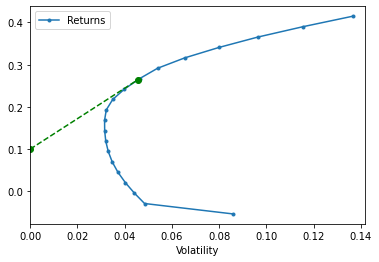

In [59]:
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left = 0)
rf = 0.1
w_msr = erk.msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)
# ADD CML
cml_x = [0, vol_msr]
cml_y =[rf, r_msr]
ax.plot(cml_x, cml_y, color = "green", marker = "o", linestyle = "dashed")

<AxesSubplot:xlabel='Volatility'>

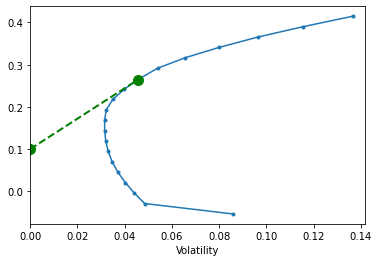

In [72]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)